## The Normal Distribution / Plotting a Function

First, we're going to learn how to plot a function $f(x)$. 

For $f$, we'll choose a **probability density function** (pdf) that we're going to use it later to generate a dataset. 

First, a short introduction to probability density functions. 

Let's assume that $x$ is a continuous random variable distributed between minus infinity and plus infinity.

If we randomly draw values from $x$, the distribution of these values along $x$ is described by the pdf of $x$. The higher the pdf at a given $x$, the larger the probability to get values here. More precisely, the probability that a value lands between $x=a$ and $x=a + da$, where $da$ is an infinitesimal interval, is $f(a) da$. 

The probability for a value to land between $-\infty$ and $+\infty$ is 1, so a pdf is always normalized to 1: 

$$\int_{-\infty}^{\infty} f(x) dx = 1.$$

In fact, the integral simply sums up the probabilities for the value to end up in all infinitesimal intervals. 

Any function can be a pdf as long as it is normalized to 1 and always positive (a probability cannot be negative). For example, the uniform distribution is perfectly flat on the full $x$ range. 

Here, we're going to choose the most famous pdf, the [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution), also known as the Gaussian distribution.

The normal distribution is available in [scipy.stats](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html). We could also use the lower-level [numpy.random.normal](https://docs.**scipy**.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html).

In [6]:
from scipy.stats import norm

To plot this function, we first need to define a range of values of $x$ for which we will evaluate the function.

With numpy, it is easy to create a numpy array with evenly spaced values in a given range:



In [1]:
import numpy as np
np.set_printoptions(suppress=True, threshold=20)
x = np.linspace(-5,5,100)
x

array([-5.       , -4.8989899, -4.7979798, ...,  4.7979798,  4.8989899,
        5.       ])

For the 100 values to be evenly positioned between -5 and 5, we get these weird decimal numbers. To avoid this, we need a value at zero, and so we need to generate an odd number of values: 

In [4]:
import numpy as np
np.set_printoptions(suppress=True, threshold=20)
x = np.linspace(-5,5,101)
x

array([-5. , -4.9, -4.8, ...,  4.8,  4.9,  5. ])

Then, we evaluate the function for all x values in one go, again thanks to numpy:

In [7]:
# we choose mean=0, sigma=1
# for our gaussian pdf
y = norm.pdf(x, 0., 1.)
y

array([0.00000149, 0.00000244, 0.00000396, ..., 0.00000396, 0.00000244,
       0.00000149])

Finally we can plot y vs x: 

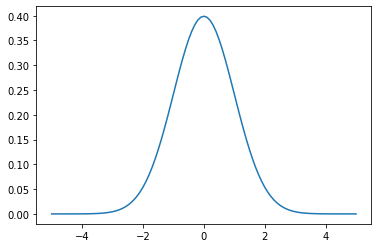

In [8]:
import matplotlib.pyplot as plt
plt.plot(x, y)

Matplotlib automatically linked the data in the y and x arrays (which must have the same length), plotted the 101 points, and connected the points with straight lines. This is not visible in the picture given the fairly large number of points. 

Note the bell shape of the normal distribution. There is a maximum probability to get x values around zero, with some uncertainty. This distribution is typical of experimental measurements. 

For example, if you measure the room temperature several times, you might get: 19.7, 19.6, 19.7, 19.5, ... These values are distributed according to the normal distribution due to underlying statistical processes affecting the measurement. The average of your measurements is a good estimate of the actual room temperature, and the spread gives you the uncertainty in your measurement. 

We did the plot step-by-step this time, but often, we define y (and sometimes x as well) on the fly: 

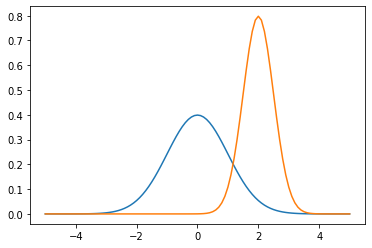

In [9]:
plt.plot(x, norm.pdf(x, 0, 1))
plt.plot(x, norm.pdf(x, 2, 0.5))

This time, we added a second normal distribution centred at 2, with a smaller spread. 

This distribution could represent the measurement of a value that is higher, with better precision. 

Note that matplotlib is clever enough to change the color automatically for the different plots, and to adapt the range of the y axis so that the whole information is visible. 

If you're a particle physicist, you know ROOT. I'm not going comment further. 

## Cosmetics: Titles, Legend, Log Scale

Scientific plots must be crystal clear, so we need to name our axes, and to add a legend. We can also give a title to the plot. Finally, it's often better to use a log scale on the y axis. Let's do all that: 

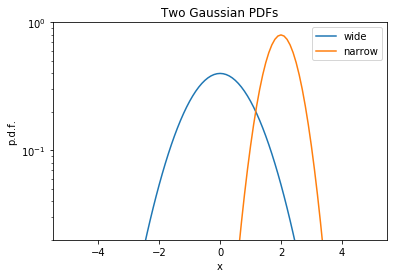

In [ ]:
plot = plt.plot(x, norm.pdf(x, 0, 1), label='wide')
plt.plot(x, norm.pdf(x, 2, 0.5), label='narrow')
plt.title('Two Gaussian PDFs')
plt.ylabel('p.d.f.')
plt.xlabel('x')
plt.yscale('log')
# limiting the y axis, or the y axis 
# would go down to 10^(- a lot) and 
# the lines would be compressed at the top 
# of the plot
plt.ylim(0.02, 1)
plt.legend()

## Machine Learning Dataset / Scatter Plot and Histograms

Now that we know what's a normal distribution, we can use it to draw a sample of random values to create a toy dataset. 

Our goal is to construct a numpy array with shape (N, 1) for the whole input data, which is a columnar array with a single value for each example, drawn from a gaussian pdf. The examples will come from two categories denoted 0 and 1, corresponding to two different gaussian pdfs. 

We also need an array of shape (N,) for the targets, which identify the true category of each example. 

We use numpy to draw 100 values from each gaussian pdf: 

In [ ]:
sigma = 1.
x0 = np.random.normal(-1.5, sigma, 100)
x1 = np.random.normal(1.5, sigma, 100)
x0.shape

(100,)

For now, these arrays don't have the right shape. We have 1D arrays of shape (100,), and we need columnar arrays of shape (100,1). Also, we will need to mix these arrays together to get a complete input data array of shape (200,1). 

Before we do this, we create the target arrays for the two categories: 

In [ ]:
y0 = np.zeros_like(x0)
y1 = np.ones_like(x1)

The two samples can be visualized as a scatter plot, with the category on the y axis: 

Text(0, 0.5, 'category')

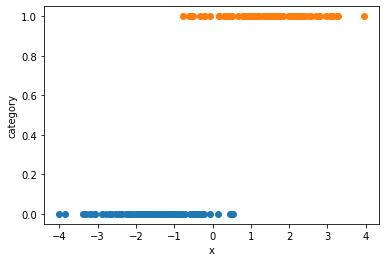

In [ ]:
plt.plot(x0, y0,'o')
plt.plot(x1, y1,'o')
plt.xlabel('x')
plt.ylabel('category')

And we can also show histograms. For each category, the histogram has 50 bins, that count the number of examples with a value falling in the bin:

Text(0, 0.5, 'counts')

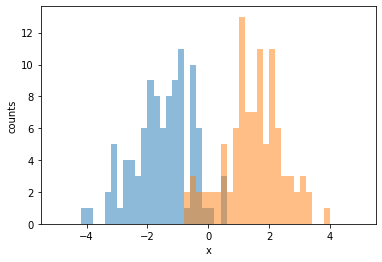

In [ ]:
# alpha is the transparency
plt.hist(x0,bins=50, range=(-5,5), alpha=0.5)
plt.hist(x1,bins=50, range=(-5,5), alpha=0.5)
plt.xlabel('x')
plt.ylabel('counts')

Finally, we merge the two samples (both the input data and the targets). For this, we use the handy [np.r_](https://docs.scipy.org/doc/numpy/reference/generated/numpy.r_.html#numpy.r_) : 

In [ ]:
x = np.r_['0,2,0', x0, x1]
y = np.concatenate([y0, y1])
print(x)
print(y)

[[-0.56925595]
 [-0.95526849]
 [-1.17954965]
 ...
 [ 2.25636484]
 [-0.54557023]
 [ 1.6207853 ]]
[0. 0. 0. ... 1. 1. 1.]


## Showing the model performance

In this tutorial, our focus is on plotting, not on machine learning. So we're just going to train a model fast, without trying to understand what we're doing. We'll come back to machine learning in a future tutorial, of course. 

To classify our examples, we will use a "logistic regression", as implemented in scikit-learn.

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs').fit(x,y)

That's it! our model has been trained already. We can now evaluate the model for a given x value: 

In [ ]:
clf.predict_proba([[-3], [3]])

array([[0.99963338, 0.00036662],
       [0.00026032, 0.99973968]])

The trained model gives a probability of almost 100% to category 0 if x=-3, and roughly the same probability to category 1 if x=3. It seems to work! 

Now, we want to plot the probability for the whole x range, overlayed to the scatter plot of the examples. We know how to do the scatter plot already, so let's focus on plotting the probability. 

The model can be seen as a function of x. So we need to define a linspace for x, and to calculate the corresponding probabilities: 

In [ ]:
xs = np.linspace(-5, 5, 101)
# xs is a 1D vector, and predict_proba 
# takes a columnar array
# as we have seen. So we turn it to a 
# columnar array: 
cxs = np.c_[xs]
probs = clf.predict_proba(cxs)
probs

array([[0.99999832, 0.00000168],
       [0.99999781, 0.00000219],
       [0.99999713, 0.00000287],
       ...,
       [0.00000204, 0.99999796],
       [0.00000156, 0.99999844],
       [0.00000119, 0.99999881]])

Finally we can do our plot: 

Text(0, 0.5, 'probability')

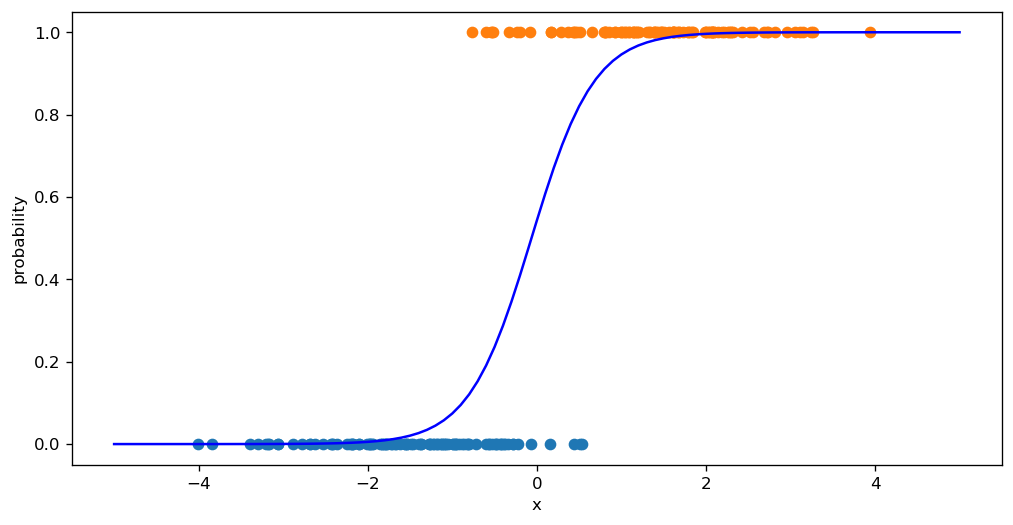

In [ ]:
plt.figure(figsize=(10,5), dpi=120)
plt.plot(x0, y0,'o')
plt.plot(x1, y1,'o')
# we select the probability for category 1
plt.plot(xs, probs[:, 1], color='blue')
plt.xlabel('x')
plt.ylabel('probability')

--- 

*Exercise*

For each category, plot the histogram of predicted probability for category 1. You should get a peak at 0 for category 0, and a peak at 1 for category 1. 

Hints: use a numpy boolean mask built with the y array to select entries of a given category in x. 

---